In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Exercise 1

### Determine PCA of a 3x2 matrix 

#### define a matrix

In [2]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


#### First do it manually!

#### 1. Subtract the mean of each variable

In [3]:
M = np.mean(A.T, axis=1)
print(M)
C = A - M
print(C)

[3. 4.]
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


#### 2. Calculate the Covariance Matrix

In [4]:
CV = np.cov(C.T)
CV

array([[4., 4.],
       [4., 4.]])

#### 3. Compute the Eigenvalues and Eigenvectors

In [5]:
vals,vecs = np.linalg.eig(CV)
vals,vecs

(array([8., 0.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

#### 4. project data of the original matrix to the new basis

In [6]:
P = vecs.T.dot(C.T)      # C
print(P.T)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


#### conclusion?

<b> Since one of the eigenvalues is zero, the first principal component can be used to explain 100% of the data (i.e., the variance in data) and the second component is not needed i.e., it can be ignored and no data will be lost. </b>

# Exercise 2

### Ok Let's do it again but for a larger matrix 20x5

#### Generate a dummy dataset.

In [7]:
X = np.random.randint(10,50,100).reshape(20,5)
print(X)

[[37 36 45 41 13]
 [31 42 14 11 42]
 [33 19 26 18 37]
 [14 41 20 46 43]
 [25 42 36 41 13]
 [21 15 40 39 47]
 [16 30 28 27 33]
 [47 32 13 32 48]
 [15 46 47 20 38]
 [31 25 17 23 32]
 [41 48 39 34 15]
 [39 24 37 39 32]
 [45 33 17 31 45]
 [14 18 35 24 24]
 [21 34 24 12 28]
 [49 10 34 23 45]
 [31 49 27 13 47]
 [22 41 25 25 45]
 [43 30 16 43 34]
 [21 18 10 39 43]]


#### 1. Subtract the mean of each variable

Subtract the mean of each variable from the dataset so that the dataset should be centered on the origin. Doing this proves to be very helpful when calculating the covariance matrix.

In [8]:
M = X - np.mean(X, axis=0)
print(M)

[[  7.2    4.35  17.5   11.95 -22.2 ]
 [  1.2   10.35 -13.5  -18.05   6.8 ]
 [  3.2  -12.65  -1.5  -11.05   1.8 ]
 [-15.8    9.35  -7.5   16.95   7.8 ]
 [ -4.8   10.35   8.5   11.95 -22.2 ]
 [ -8.8  -16.65  12.5    9.95  11.8 ]
 [-13.8   -1.65   0.5   -2.05  -2.2 ]
 [ 17.2    0.35 -14.5    2.95  12.8 ]
 [-14.8   14.35  19.5   -9.05   2.8 ]
 [  1.2   -6.65 -10.5   -6.05  -3.2 ]
 [ 11.2   16.35  11.5    4.95 -20.2 ]
 [  9.2   -7.65   9.5    9.95  -3.2 ]
 [ 15.2    1.35 -10.5    1.95   9.8 ]
 [-15.8  -13.65   7.5   -5.05 -11.2 ]
 [ -8.8    2.35  -3.5  -17.05  -7.2 ]
 [ 19.2  -21.65   6.5   -6.05   9.8 ]
 [  1.2   17.35  -0.5  -16.05  11.8 ]
 [ -7.8    9.35  -2.5   -4.05   9.8 ]
 [ 13.2   -1.65 -11.5   13.95  -1.2 ]
 [ -8.8  -13.65 -17.5    9.95   7.8 ]]


#### 2. Calculate the Covariance Matrix

Calculate the Covariance Matrix of the mean-centered data. 

In [9]:
CV = np.cov(M.T)
print(CV)

[[135.32631579 -14.75789474 -19.47368421  11.64210526   5.98947368]
 [-14.75789474 135.60789474   9.71052632 -14.29736842 -26.82105263]
 [-19.47368421   9.71052632 124.47368421  10.97368421 -62.89473684]
 [ 11.64210526 -14.29736842  10.97368421 120.99736842 -28.85263158]
 [  5.98947368 -26.82105263 -62.89473684 -28.85263158 131.95789474]]


Note: the matrix is symmetrical

#### 3. Compute the Eigenvalues and Eigenvectors

Now, compute the Eigenvalues and Eigenvectors for the calculated Covariance matrix. 

In [10]:
vals, vecs = np.linalg.eig(CV)
print(vals, vecs)

[211.70390101 156.10551771  58.12762171 124.19352127  98.2325962 ] [[ 0.23471627 -0.57119103  0.10952584 -0.6922827  -0.35692833]
 [-0.31874492  0.52707392  0.23032689 -0.6769502   0.33057936]
 [-0.59557014 -0.08323305  0.62108606  0.20224364 -0.46012834]
 [-0.20431912 -0.59183095  0.24471519  0.07818065  0.73620112]
 [ 0.66847577  0.19683057  0.69951426  0.12437198  0.09802695]]


Note: The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis.
A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

#### 4. Sort Eigenvalues in descending order

Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.

In [11]:
ST = vecs[:,np.argsort(vals)[::-1]]
print(ST)

[[ 0.23471627 -0.57119103 -0.6922827  -0.35692833  0.10952584]
 [-0.31874492  0.52707392 -0.6769502   0.33057936  0.23032689]
 [-0.59557014 -0.08323305  0.20224364 -0.46012834  0.62108606]
 [-0.20431912 -0.59183095  0.07818065  0.73620112  0.24471519]
 [ 0.66847577  0.19683057  0.12437198  0.09802695  0.69951426]]


Note: Each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.
Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

#### 5. Select a subset from the rearranged Eigenvalue matrix

Select a subset of n first eigenvectors from the rearranged Eigenvector matrix as per our need, n is desired dimension of your final reduced data. i.e. "n_components=2" means you selected the first two principal components.

In [12]:
PC2 = ST[:,:2]
print(PC2)

[[ 0.23471627 -0.57119103]
 [-0.31874492  0.52707392]
 [-0.59557014 -0.08323305]
 [-0.20431912 -0.59183095]
 [ 0.66847577  0.19683057]]


Note: The final dimensions of X_reduced will be ( 20, 2 ) and originally the data was of higher dimensions ( 20, 5 ).

#### 6. Transform the data

Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.

In [13]:
np.matmul(M, PC2)

array([[-27.40083617, -14.71840093],
       [ 13.25644173,  17.91442855],
       [  9.13755317,  -1.47641973],
       [ -0.47110413,   6.08095122],
       [-26.76976973,  -3.95256754],
       [  1.65201185,  -8.35582995],
       [ -4.06273303,   7.75137398],
       [ 20.51507466,  -7.65960062],
       [-15.9405881 ,  20.30128916],
       [  7.75180794,  -0.3658043 ],
       [-23.94630396,  -5.64240197],
       [ -5.23222561, -16.59636277],
       [ 15.54350844,  -6.32173762],
       [-10.27954205,   1.99025539],
       [ -2.05944289,  15.22995807],
       [ 15.3233673 , -17.40951612],
       [  6.21655604,  20.32240723],
       [  4.05642832,  13.91736878],
       [  6.82081798, -15.94445195],
       [ 15.88897823,  -5.06493889]])

In [14]:
vals.sort()
vals = vals[::-1]
vals

array([211.70390101, 156.10551771, 124.19352127,  98.2325962 ,
        58.12762171])

In [15]:
explained_variance  = (sum(vals[:2])/sum(vals))*100
print("The explained variance is:", explained_variance)

The explained variance is: 56.72892024145318


<b> Here as we can see from from the above calculation, 52% of the variance can be explained using the first 2 principal components. </b>

# Exercise 3

### Now, let’s just combine everything above by making a function and try our Principal Component analysis from scratch on an example.

#### Create a PCA function accepting data matrix and the number of components as input arguments.

In [16]:
def PCA(X, n_components=2):
    M = np.mean(X.T, axis=1)
    C = X - M
    CV = np.cov(C.T)
    vals,vecs = np.linalg.eig(CV)
    vecs_sorted = vecs[:,np.argsort(vals)[::-1]]
    return (vals, np.matmul(C, vecs_sorted[:,:n_components]))
    

#### Let's use the IRIS dataset to test our PCA function, and by the same way see if we can classify the dataset in the projected space

In [17]:
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 1. prepare the dataset & target set for classification

In [18]:
X = np.array(data.drop('target', axis=1))

#### 2. Apply the PCA function

In [19]:
eigen_vals,res = PCA(X, n_components=2)

#### 3. Create a Pandas Dataframe of reduced Dataset with target data

In [20]:
res = pd.DataFrame(res, columns=['c1','c2'])
res['target'] = data['target']
res.head()

,c1,c2,target
0,-2.684207,-0.326607,Iris-setosa
1,-2.715391,0.169557,Iris-setosa
2,-2.889820,0.137346,Iris-setosa
3,-2.746437,0.311124,Iris-setosa
4,-2.728593,-0.333925,Iris-setosa


#### 4. Vizualize the data with one and two principal components

In [21]:
res['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:xlabel='c1', ylabel='c2'>

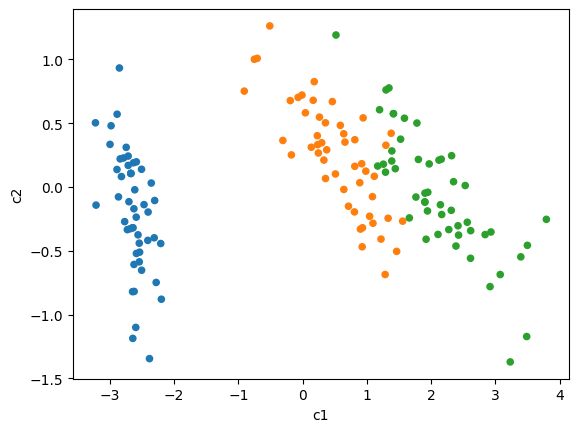

In [22]:
colormap = {'Iris-setosa':'tab:blue', 'Iris-versicolor':'tab:orange', 'Iris-virginica':'tab:green'}
res.plot(kind='scatter',x='c1',y='c2', c=res['target'].map(colormap))

<AxesSubplot:xlabel='c1', ylabel='c1'>

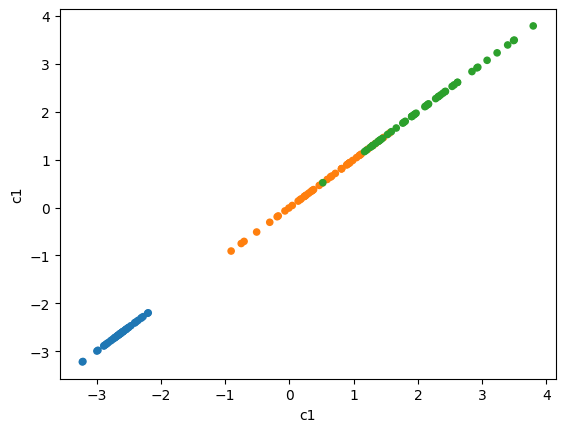

In [23]:
colormap = {'Iris-setosa':'tab:blue', 'Iris-versicolor':'tab:orange', 'Iris-virginica':'tab:green'}
res[['c1','target']].plot(kind='scatter',x='c1',y='c1', c=res['target'].map(colormap))

In [24]:
explained_variance_1  = (sum(eigen_vals[:1])/sum(eigen_vals))*100
print("The explained variance for PC1 is:", explained_variance_1)
explained_variance_2  = (sum(eigen_vals[:2])/sum(eigen_vals))*100
print("The explained variance for PC1+PC2 is:", explained_variance_2)

The explained variance for PC1 is: 92.46162071742684
The explained variance for PC1+PC2 is: 97.76317750248035


<b>Here we can clearly see that with PC1 92.46% of the data can be explained.

With PC1 and PC2, 97.76% of the data can be explained. </b>

# More?

### Go to: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [25]:
eigen_vals2,res2 = PCA(X, n_components=3)
res2,eigen_vals2

(array([[-2.68420713, -0.32660731, -0.02151184],
        [-2.71539062,  0.16955685, -0.20352143],
        [-2.88981954,  0.13734561,  0.02470924],
        [-2.7464372 ,  0.31112432,  0.03767198],
        [-2.72859298, -0.33392456,  0.0962297 ],
        [-2.27989736, -0.74778271,  0.17432562],
        [-2.82089068,  0.08210451,  0.26425109],
        [-2.62648199, -0.17040535, -0.01580151],
        [-2.88795857,  0.57079803,  0.02733541],
        [-2.67384469,  0.1066917 , -0.1915333 ],
        [-2.50652679, -0.65193501, -0.069275  ],
        [-2.61314272, -0.02152063,  0.10765035],
        [-2.78743398,  0.22774019, -0.20032779],
        [-3.22520045,  0.50327991,  0.06841363],
        [-2.64354322, -1.1861949 , -0.1445057 ],
        [-2.38386932, -1.34475434,  0.28373066],
        [-2.6225262 , -0.81808967,  0.14531599],
        [-2.64832273, -0.31913667,  0.03339425],
        [-2.19907796, -0.87924409, -0.11452146],
        [-2.58734619, -0.52047364,  0.21957209],
        [-2.3105317 